<a href="https://colab.research.google.com/github/Kuol287/Kuol287/blob/main/SUICIDE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
import string
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


**Mounting the Drive to Access Data**

In [ ]:
Data_path="/content/drive/MyDrive/Graduation Projectt/DATASET/Suicide_Detection.csv"
df = pd.read_csv(Data_path)

**Display the first few dat rows**

In [ ]:
print(df.head())

   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide


**Display the data summary of our data**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB
None


**Ensure that columns and Labels are correctly named**

In [ ]:
text_column = 'text'  # Change this if your column name differs
label_column = 'label'  # Change this if your column name differs

**Text Preprocessing**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-letter characters
    tokens = word_tokenize(text)  # Tokenization

    if not tokens:
        return ''

    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Stopword removal

    if not tokens:
        return ''

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

**Apply Preprocessing**

In [ ]:
df[text_column] = df[text_column].astype(str).apply(preprocess_text)

** Remove rows with empty text**  

In [ ]:
df = df[df[text_column] != '']

**Reset index after removing rows**

In [ ]:
df.reset_index(drop=True, inplace=True)

** Convert categories to binary (1 for suicide, 0 for non-suicide)**

In [ ]:
label_column = 'class'  # Change this to match your dataset's column name
df[label_column] = df[label_column].map({'suicide': 1, 'non-suicide': 0})
#label_column = 'class'
#df.loc[:, label_column] = df[label_column].map({'suicide': 1, 'non-suicide': 0})

<ipython-input-10-a278f6d42309>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_column] = df[label_column].map({'suicide': 1, 'non-suicide': 0})


**Display to check the first entries to Confirm that  0 and 1 are used**

In [ ]:
print(df.head())

   Unnamed: 0                                               text  class
0           2  ex wife threatening suiciderecently left wife ...      1
1           3  weird dont get affected compliment coming some...      0
2           4  finally almost never hear bad year ever swear ...      0
3           8                     need helpjust help im cry hard      1
4           9  im losthello name adam ive struggling year im ...      1


**Convert text to numerical representation**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df[text_column])
y = df[label_column]

**Handle NaN values in the target variable**

In [ ]:
df.dropna(subset=[label_column], inplace=True)

**Reset index after dropping rows**

In [ ]:
df.reset_index(drop=True, inplace=True)

**Update X and y after removing NaN values**

In [ ]:
X = vectorizer.fit_transform(df[text_column])
y = df[label_column]

**Split dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train SVM Using SGD**

In [ ]:
sgd_svm = SGDClassifier(loss="hinge",  # Hinge loss for SVM
                        penalty="l2",  # L2 regularization
                        alpha=0.0001,  # Regularization strength
                        max_iter=1000,  # Number of iterations
                        tol=1e-3,  # Stopping criteria
                        random_state=42)

sgd_svm.fit(X_train, y_train)


SGDClassifier(random_state=42)

**Train the Naive Bayes Model**

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

**Plotting the Hinge Loss for SVM Model**

Confusion Matrix for SGD SVM:
[[21167  2029]
 [ 1317 21886]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     23203
           1       0.94      0.91      0.93     23196

    accuracy                           0.93     46399
   macro avg       0.93      0.93      0.93     46399
weighted avg       0.93      0.93      0.93     46399



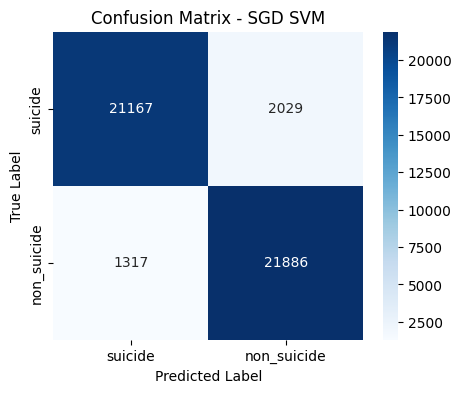

Confusion Matrix for Naïve Bayes:
[[21974  1222]
 [ 3311 19892]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90     23203
           1       0.87      0.95      0.91     23196

    accuracy                           0.90     46399
   macro avg       0.91      0.90      0.90     46399
weighted avg       0.91      0.90      0.90     46399



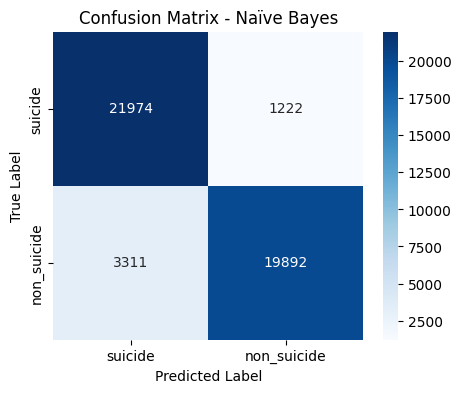

In [ ]:
def plot_hinge_loss(sgd_svm):

    plt.plot(sgd_svm.loss_curve_)
    plt.xlabel('Iterations')
    plt.ylabel('Hinge Loss')
    plt.title('Hinge Loss Curve')
    plt.show()

models = {'SGD SVM': sgd_svm, 'Naïve Bayes': nb_model} # Define models dictionary

X_test_tfidf = X_test



for sgd_svm, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])  # Assuming 1 for suicide, 0 for non-suicide

    print(f'Confusion Matrix for {sgd_svm}:')
    print(cm)
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['suicide', 'non_suicide'], yticklabels=['suicide', 'non_suicide'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {sgd_svm}')
    plt.show()

    if sgd_svm == 'SGD SVM' and hasattr(model, 'loss_curve_'):
        plot_hinge_loss(model)




**Evaluate the Models**

In [ ]:
    if sgd_svm == 'SGD SVM':
        y_pred_svm = y_pred
    elif nb_model == 'Naïve Bayes':
        y_pred_nb = y_pred

print("SVM Model Accuracy:", accuracy_score(y_test, y_pred))
print("Naïve Bayes Model Accuracy:", accuracy_score(y_test, y_pred))
#print("SGD SVM Classification Report:\n", classification_report(y_test, y_pred))
#print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred))


SVM Model Accuracy: 0.9023039289639863
Naïve Bayes Model Accuracy: 0.9023039289639863


**Training CNN MODEL**

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Embedding, LSTM  # Import LSTM here
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping # Import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2


def text_cnn_lstm_model(input_length, vocab_size, embedding_dim):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length),
        Conv1D(64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        LSTM(128, return_sequences=True, recurrent_regularizer=l2(0.01), dropout=0.5),
        LSTM(64, recurrent_regularizer=l2(0.01), dropout=0.5),
        Dropout(0.6),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        BatchNormalization(),
        Dropout(0.6),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Use a ReduceLROnPlateau callback to reduce learning rate if validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# 1. Create a Tokenizer instance
tokenizer = Tokenizer(num_words=5000)  # You can adjust num_words

# 2. Fit the tokenizer on your training data
tokenizer.fit_on_texts(df[text_column])

# 3. Convert text to sequences using the original TEXT data
X_train_seq = tokenizer.texts_to_sequences(df[text_column][y_train.index])  # Access text using y_train.index
X_test_seq = tokenizer.texts_to_sequences(df[text_column][y_test.index])  # Access text using y_test.index


# 4. Pad sequences to ensure uniform length
max_length = 100  # You can adjust max_length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


# Define early_stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Instantiate the CNN model
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 100  # You can adjust the embedding dimension
model = text_cnn_lstm_model(max_length, vocab_size, embedding_dim) # Call the function to create the model

# Train the model with additional callback
history = model.fit(
    X_train_seq, y_train,
    validation_data=(X_test_seq, y_test),
    epochs=30,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, reduce_lr]
)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 152s 24ms/step - accuracy: 0.8434 - loss: 0.8769 - val_accuracy: 0.9187 - val_loss: 0.2735 - learning_rate: 0.0010
Epoch 2/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 195s 24ms/step - accuracy: 0.9128 - loss: 0.2828 - val_accuracy: 0.9198 - val_loss: 0.2504 - learning_rate: 0.0010
Epoch 3/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 139s 24ms/step - accuracy: 0.9164 - loss: 0.2623 - val_accuracy: 0.9185 - val_loss: 0.2558 - learning_rate: 0.0010
Epoch 4/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.9203 - loss: 0.2521 - val_accuracy: 0.9182 - val_loss: 0.2425 - learning_rate: 0.0010
Epoch 5/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.9211 - loss: 0.2484 - val_accuracy: 0.9265 - val_loss: 0.2262 - learning_rate: 0.0010
Epoch 6/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step - accuracy: 0.9239 - loss: 0.2428 - val_accuracy: 0.9231 - val_loss: 0.2339 - learning_rate: 0.0010
Epoch 7/30
5800/5800 ━━━━━━━━━━━━━━━━━━━━ 142s 24ms/step -

**CNN model Evaluation**

In [ ]:
eval_loss, eval_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {eval_loss:.4f}, Test Accuracy: {eval_acc:.4f}")

NameError: name 'model' is not defined

**Saving the Models**

In [ ]:
with open('sgd_svm.pkl', 'wb') as f:
    pickle.dump(sgd_svm, f)
with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)
with open('text_cnn_lstm_model', 'wb') as f:
    pickle.dump(text_cnn_lstm_modell, f)
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Models and vectorizer saved successfully.")


Making **predictions**

In [ ]:
with open('sgd_svm.pkl', 'rb') as f:
    sgd_svm = pickle.load(f)
with open('nb_model.pkl', 'rb') as f:
    nb_model = pickle.load(f)
with open('sgd_svm.pkl', 'rb') as f:
    sgd_svm = pickle.load(f)
with open('tfidf_vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

def test_model(text):
    preprocessed_text = preprocess_text(text)
    text_vectorized = vectorizer.transform([preprocessed_text])

    svm_prediction = sgd_svm.predict(text_vectorized)[0]
    nb_prediction = nb_model.predict(text_vectorized)[0]
    sgd_prediction = sgd_svm.predict(text_vectorized)[0]

    print("SVM Model Prediction:", "Suicidal" if svm_prediction == 1 else "Non-Suicidal")
    print("Naïve Bayes Model Prediction:", "Suicidal" if nb_prediction == 1 else "Non-Suicidal")
    print("SGD SVM Model Prediction:", "Suicidal" if sgd_prediction == 1 else "Non-Suicidal")





